# Insights from Failed Orders

We have two data sets: `data_orders` and `data_offers`, both being stored in a CSV format. The `data_orders` data set contains the following columns:

- `order_datetime` - time of the order
- `origin_longitude` - longitude of the order
- `origin_latitude` - latitude of the order
- `m_order_eta` - time before order arrival
- `order_gk` - order number
- `order_status_key` - status, an enumeration consisting of the following mapping:
    - `4` - canceled by the client,
    - `9` - canceled by the system, i.e., a reject
- `is_driver_assigned_key` - whether a driver has been assigned
- `cancellation_time_in_seconds` - how many seconds passed before the cancellation

The `data_offers` data set is a simple map with 2 columns:

- `order_gk` - order number, associated with the same column from the orders data set
- `offer_id` - ID of an offer

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration
### Orders

In [2]:
orders = pd.read_csv('datasets/data_orders.csv')
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


#### Dtypes (orders)

In [3]:
orders.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
dtype: object

#### Describe (orders)

In [4]:
orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


#### Isna (orders)

In [5]:
orders.isna().sum()

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

### Offers

In [6]:
offers = pd.read_csv('datasets/data_offers.csv')
offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


#### Dtypes (offers)

In [7]:
offers.dtypes

order_gk    int64
offer_id    int64
dtype: object

## Data Cleaning

### Orders cleaning
#### Column `order_datetime`
Now let's check if all time values are valid. If there is an error, `errors='raise'` will let us know it.

In [8]:
pd.to_datetime(orders.order_datetime, errors='raise', format='%H:%M:%S')

0       1900-01-01 18:08:07
1       1900-01-01 20:57:32
2       1900-01-01 12:07:50
3       1900-01-01 13:50:20
4       1900-01-01 21:24:45
                ...        
10711   1900-01-01 13:11:35
10712   1900-01-01 13:13:55
10713   1900-01-01 13:17:21
10714   1900-01-01 13:16:28
10715   1900-01-01 11:49:35
Name: order_datetime, Length: 10716, dtype: datetime64[ns]

#### Column `origin_longitude`

$ longitude \in [-180; 180] $

As we see in the [Describe](#describe) section, min `longitude` is 1.07 and max `longitude` is -0.87.

So, all values are valid.

#### Column `origin_latitude`

$ latitude \in [-90; 90] $

As we see in the [Describe](#describe) section, min `latitude` is 51.39 and max `latitude` is 51.49.

So, all values are valid.

#### Column `m_order_eta`

As we see in the [Isna](#isna-orders) section, most (7902 out of 10716) records of `m_order_eta` are absent.
`m_order_eta` seems to be present in the rows where `is_driver_assigned_key` equals `1`.

In [9]:
(orders.m_order_eta.isna() & orders.is_driver_assigned_key == 0).value_counts()

True    10716
Name: count, dtype: int64

That's right. Perhaps it means that `m_order_eta` defines how much time the driver spent on arrival. If a driver hasn't been assigned yet, then no time was spent on arrival, and `m_order_eta` is NaN.
So, there's no need to restore the absent values.

#### Column `order_status_key`

There are 2 possible values in the column: `4` and `9`. So we can use the `category` dtype here.

In [10]:
orders.order_status_key = orders.order_status_key.astype('category')
orders.order_status_key

0        4
1        4
2        4
3        4
4        9
        ..
10711    4
10712    4
10713    4
10714    4
10715    4
Name: order_status_key, Length: 10716, dtype: category
Categories (2, int64): [4, 9]

#### Column `is_driver_assigned_key`

Here we have 2 possible values: `1` and `0`, which means that the driver is either assigned or not. So, it can be expressed as the boolean value.

In [11]:
orders.is_driver_assigned_key = orders.is_driver_assigned_key.astype('bool')
orders.is_driver_assigned_key

0         True
1        False
2         True
3         True
4        False
         ...  
10711    False
10712    False
10713     True
10714    False
10715     True
Name: is_driver_assigned_key, Length: 10716, dtype: bool

#### Column `cancellations_time_in_seconds`

There are 3402 values equal to NaN in the column. They seem to be equal to NaN in the same rows where `order_status_key` is equal to `9`, which means 'canceled by system'.

In [12]:
((orders.order_status_key == 9) & (orders.cancellations_time_in_seconds.isna())).value_counts()

False    7307
True     3409
Name: count, dtype: int64

Well, so each `NaN` in `cancellations_time_in_seconds` corresponds to `9` in `order_status_key`. And each integer in `cancellations_time_in_seconds` corresponds to `4` in `order_status_key`.

So, it means that `cancellations_time_in_seconds` contains the data about cancellations time from the client's side. Therefore NaN values shouldn't be restored.

### Offers cleaning
In `order_gk` and `offer_id` no value is missing. The dtype is int64, so all numbers are valid and there is no need to check them. The only thing i want to see is whether there are duplicates.
#### Column `order_gk`

In [13]:
offers.order_gk.duplicated().value_counts()

order_gk
True     236396
False     97967
Name: count, dtype: int64

So, when the client orders a ride, they can get several offers.

#### Column `offer_id`

In [14]:
offers.offer_id.duplicated().value_counts()

offer_id
False    334363
Name: count, dtype: int64

Obviously, the driver can make only one offer per order. That's why all values are unique.

## Data Analisis

### 1. Distribution of orders according to reasons for failure
>Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [31]:
r = orders.groupby(['order_status_key', 'is_driver_assigned_key']).size().unstack(0)
r.columns = ['by client', 'by system']
r.index = ['Unassigned', 'Assigned']
r

,by client,by system
Unassigned,4496,3406
Assigned,2811,3


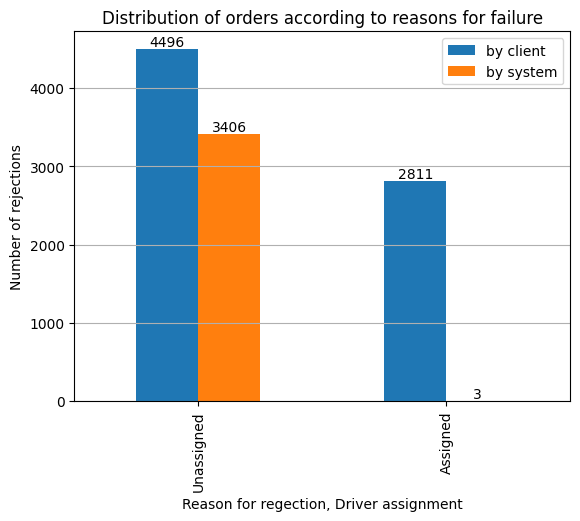

In [45]:
plot1 = r.plot(kind='bar')
plot1.set_title('Distribution of orders according to reasons for failure')
plot1.set_xlabel('Reason for regection, Driver assignment')
plot1.set_ylabel('Number of rejections')
plot1.bar_label(container=plot1.containers[0])
plot1.bar_label(container=plot1.containers[1])
plot1.grid(axis='y')